In [47]:
%load_ext autoreload
%aimport mhlib.demos.vertex_cover
%autoreload 1
from mhlib.settings import settings, parse_settings
from mhlib.log import init_logger
from mhlib.demos.vertex_cover import VertexCoverInstance, VertexCoverSolution
from mhlib.gvns import GVNS, Method
from mhlib.demos.common import run_optimization
import logging
import matplotlib
import numpy as np
import scipy.stats
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline
from IPython.display import set_matplotlib_formats; set_matplotlib_formats('png', 'pdf')
if not settings.__dict__: parse_settings(args='')
settings.mh_maxi = False
init_logger()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
runs=100
problem_name = "gnm-1000-2000"
settings.mh_titer=100000
logger = logging.getLogger("mhlib")
logger.info(f"mhlib demo for solving {problem_name}")
# logger.info(get_settings_as_str())
res_approx = list()
res_approx_red = list()
res_deg_greedy = list()
res_deg_greedy_ls = list()
for run in range(runs):
    instance = VertexCoverInstance(problem_name+f'-{run+1}')
    # logger.info(f"{problem_name} instance read:\n" + str(instance))
    solution = VertexCoverSolution(instance)
    solution.two_approximation_construction()
    res_approx.append(solution.obj())
    solution.remove_redundant()
    res_approx_red.append(solution.obj())
    solution.greedy_construction()
    res_deg_greedy.append(solution.obj())
    alg = GVNS(solution,
            [Method(f"ch0", VertexCoverSolution.construct, 0)],
            [Method(f"li2", VertexCoverSolution.local_improve, 2)],
            [Method(f"sh{i}", VertexCoverSolution.shaking, i) for i in range(0)])
    alg.run()
    alg.method_statistics()
    alg.main_results()
    res_deg_greedy_ls.append(solution.obj())

mhlib demo for solving gnm-1000-2000
mhlib demo for solving gnm-1000-2000
mhlib demo for solving gnm-1000-2000
mhlib demo for solving gnm-1000-2000
mhlib demo for solving gnm-1000-2000
I  iteration             best          obj_old          obj_new         time method               info
I  iteration             best          obj_old          obj_new         time method               info
I  iteration             best          obj_old          obj_new         time method               info
I  iteration             best          obj_old          obj_new         time method               info
I  iteration             best          obj_old          obj_new         time method               info
I          1        546.00000       546.000000        546.00000       0.0344 ch0                  
I          1        546.00000       546.000000        546.00000       0.0344 ch0                  
I          1        546.00000       546.000000        546.00000       0.0344 ch0                  
I  

In [49]:
res_vns = []
for run in range(runs):
    instance = VertexCoverInstance(problem_name+f'-{run+1}')
    # logger.info(f"{problem_name} instance read:\n" + str(instance))
    solution = VertexCoverSolution(instance)
    alg = GVNS(solution,
            [Method(f"ch0", VertexCoverSolution.construct, 0)],
            [Method(f"li2", VertexCoverSolution.local_improve, 2)],
            [Method(f"sh{i}", VertexCoverSolution.shaking, i) for i in range(1,5)])
    alg.run()
    alg.method_statistics()
    alg.main_results()
    res_vns.append(solution.obj())

I  iteration             best          obj_old          obj_new         time method               info
I  iteration             best          obj_old          obj_new         time method               info
I  iteration             best          obj_old          obj_new         time method               info
I  iteration             best          obj_old          obj_new         time method               info
I  iteration             best          obj_old          obj_new         time method               info
I          1        546.00000         0.000000        546.00000       0.0370 ch0                  
I          1        546.00000         0.000000        546.00000       0.0370 ch0                  
I          1        546.00000         0.000000        546.00000       0.0370 ch0                  
I          1        546.00000         0.000000        546.00000       0.0370 ch0                  
I          1        546.00000         0.000000        546.00000       0.0370 ch0         

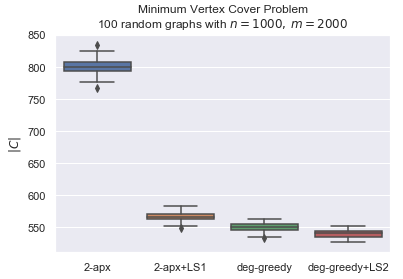

In [50]:
df = pd.DataFrame({'2-apx': res_approx, '2-apx+LS1': res_approx_red, 
                   'deg-greedy': res_deg_greedy, 'deg-greedy+LS2': res_deg_greedy_ls,
                   'VNS': res_vns})
sns.boxplot(data=df[['2-apx', '2-apx+LS1', 'deg-greedy', 'deg-greedy+LS2']])
plt.title(f'Minimum Vertex Cover Problem\n{runs} random graphs with $n=1000,\,m=2000$')
plt.ylabel('$|C|$');
# plt.ylim((0,1000))
plt.savefig("vcp1.pdf")

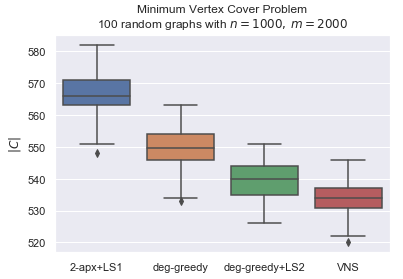

In [51]:
plt.title(f'Minimum Vertex Cover Problem\n{runs} random graphs with $n=1000,\,m=2000$')
plt.ylabel('$|C|$');
sns.boxplot(data=df[['2-apx+LS1', 'deg-greedy', 'deg-greedy+LS2', 'VNS']]);
plt.savefig("vcp2.pdf")
